<img src="https://raw.githubusercontent.com/rhatiro/Curso_EBAC-Profissao_Cientista_de_Dados/main/ebac-course-utils/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Profissão: Cientista de Dados**
### **Módulo 12** | Regressão I | Exercício 2

---

# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [72]:
# Importando as bibliotecas e pacotes necessários:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score
%matplotlib inline

In [74]:
# Carregando a base de dados
tips = sns.load_dataset(('tips'))

# Criando a variável net_bill:

# Calculando a porcentagem da gorjeta em relação ao valor total da conta
tips['tip_pct'] = tips['tip'] / tips['total_bill']
# Calculando o valor líquido da conta (valor total menos a gorjeta)
tips['net_bill'] = tips['total_bill'] * (1 - tips['tip_pct'])

tips.head() # mostrando as 5 primeiras linhas do DataFrame

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808,20.98


In [75]:
# Ajustando o modelo
modelo = smf.ols(formula='tip_pct ~ net_bill', data=tips).fit()

# Imprimindo o resumo do modelo
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     56.25
Date:                Fri, 29 Sep 2023   Prob (F-statistic):           1.21e-12
Time:                        15:19:43   Log-Likelihood:                 361.93
No. Observations:                 244   AIC:                            -719.9
Df Residuals:                     242   BIC:                            -712.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2162      0.008     26.401      0.0

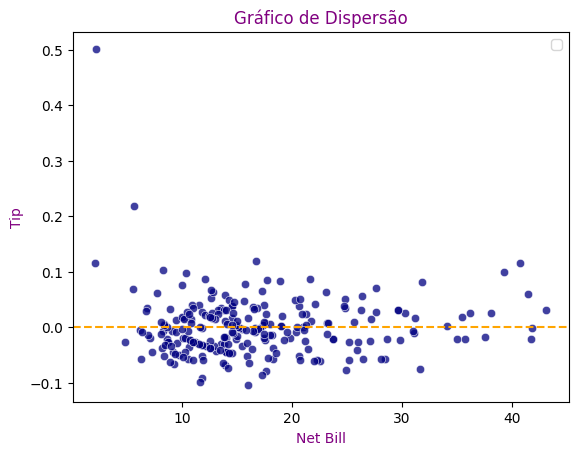

In [76]:
# Criando o gráfico de dispersão
tips['res'] = modelo.resid
sns.scatterplot(x='net_bill', y='res', data=tips, alpha=.75, color = 'navy')
plt.axhline(y=0, color='orange', linestyle='--')
plt.xlabel('Net Bill', color = 'purple')
plt.ylabel('Tip', color ='purple')
plt.title('Gráfico de Dispersão', color = 'purple')
plt.legend()
plt.show()

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

In [77]:
# Ajustando o modelo com o logaritmo de net_bill
tips['log_net_bill'] = np.log(tips['net_bill'])
model_log = smf.ols(formula='tip_pct ~ log_net_bill', data=tips)
results_log = model_log.fit()

# Mostrando o resultado
print(results_log.summary())

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     98.21
Date:                Fri, 29 Sep 2023   Prob (F-statistic):           1.19e-19
Time:                        15:20:09   Log-Likelihood:                 377.99
No. Observations:                 244   AIC:                            -752.0
Df Residuals:                     242   BIC:                            -745.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.3468      0.019     18.198   

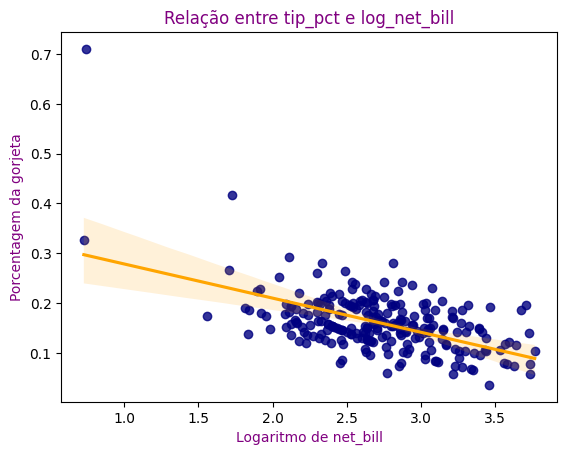

In [78]:
# Fazendo o gráfico
sns.regplot(x='log_net_bill', y='tip_pct', data=tips, line_kws={'color': 'orange'}, scatter_kws={'color': 'navy'})
plt.title('Relação entre tip_pct e log_net_bill', color='purple')
plt.xlabel('Logaritmo de net_bill', color='purple')
plt.ylabel('Porcentagem da gorjeta', color='purple')
plt.show()

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

In [79]:
# Criando as variáveis para o polinômio de segundo grau
tips['net_bill_squared'] = tips['net_bill'] ** 2

# Ajustando o modelo polinomial
modelo3 = smf.ols('tip_pct ~ net_bill + np.power(net_bill,2)', data=tips).fit()

#Mostrando os resultados
print(modelo3.summary())


                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     37.97
Date:                Fri, 29 Sep 2023   Prob (F-statistic):           4.62e-15
Time:                        15:20:23   Log-Likelihood:                 369.85
No. Observations:                 244   AIC:                            -733.7
Df Residuals:                     241   BIC:                            -723.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.27

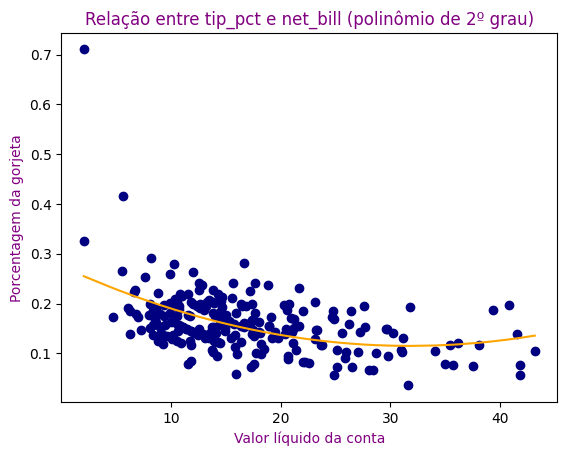

In [80]:
# Criando uma nova coluna para os valores previstos
tips['predicted'] = model_poly.predict()

# Ordenando os valores para a plotagem
sorted_tips = tips.sort_values(by='net_bill')

# Fazendo o gráfico
plt.scatter(sorted_tips['net_bill'], sorted_tips['tip_pct'], color='navy')
plt.plot(sorted_tips['net_bill'], sorted_tips['predicted'], color='orange')
plt.title('Relação entre tip_pct e net_bill (polinômio de 2º grau)', color='purple')
plt.xlabel('Valor líquido da conta', color='purple')
plt.ylabel('Porcentagem da gorjeta', color='purple')
plt.show()


###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

In [81]:
# Ajustando o modelo com o logaritmo de tip_pct
tips['log_tip_pct'] = np.log(tips['tip_pct'])
model_log_tip_pct = smf.ols(formula='log_tip_pct ~ net_bill', data=tips)
results_log_tip_pct = model_log_tip_pct.fit()
print(results_log_tip_pct.summary())


                            OLS Regression Results                            
Dep. Variable:            log_tip_pct   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     77.95
Date:                Fri, 29 Sep 2023   Prob (F-statistic):           2.18e-16
Time:                        15:20:31   Log-Likelihood:                -55.678
No. Observations:                 244   AIC:                             115.4
Df Residuals:                     242   BIC:                             122.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5264      0.045    -33.658      0.0

In [82]:
# Calculando o R² em tip_pct
predicted_tip_pct = np.exp(results_log_tip_pct.predict())
r2 = r2_score(tips['tip_pct'], predicted_tip_pct)
print(f"O R² em tip_pct é {r2}")


O R² em tip_pct é 0.19257454237419414


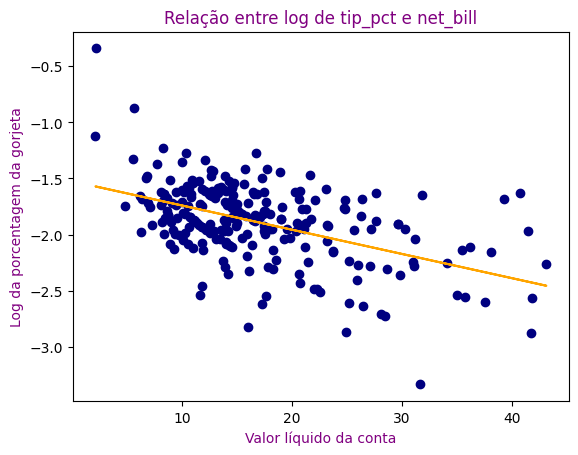

In [83]:
# Fazendo o gráfico
plt.scatter(tips['net_bill'], tips['log_tip_pct'], color='navy')
plt.plot(tips['net_bill'], results_log_tip_pct.predict(), color='orange')
plt.title('Relação entre log de tip_pct e net_bill', color='purple')
plt.xlabel('Valor líquido da conta', color='purple')
plt.ylabel('Log da porcentagem da gorjeta', color='purple')
plt.show()


###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

In [84]:
# Ajustando o modelo com o logaritmo de tip_pct e net_bill
model_log_both = smf.ols(formula='log_tip_pct ~ log_net_bill', data=tips)
results_log_both = model_log_both.fit()
print(results_log_both.summary())

                            OLS Regression Results                            
Dep. Variable:            log_tip_pct   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     94.10
Date:                Fri, 29 Sep 2023   Prob (F-statistic):           5.26e-19
Time:                        15:20:53   Log-Likelihood:                -49.670
No. Observations:                 244   AIC:                             103.3
Df Residuals:                     242   BIC:                             110.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.8373      0.110     -7.614   

In [85]:
# Calculando o R² em tip_pct
predicted_tip_pct = np.exp(results_log_both.predict())
r2 = r2_score(tips['tip_pct'], predicted_tip_pct)
print(f"O R² em tip_pct é {r2}")

O R² em tip_pct é 0.32190905417078275


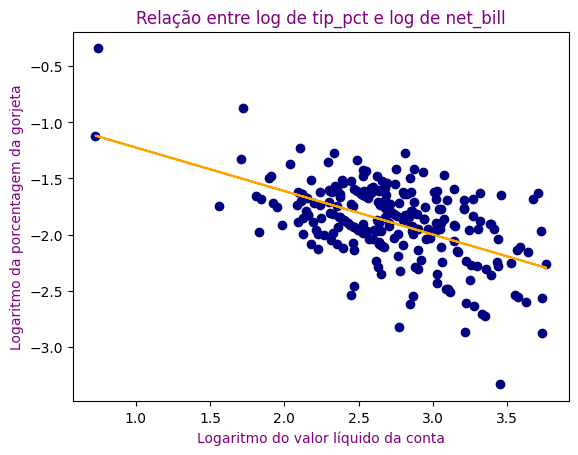

In [86]:
# Fazendo o gráfico
plt.scatter(tips['log_net_bill'], tips['log_tip_pct'], color='navy')
plt.plot(tips['log_net_bill'], results_log_both.predict(), color='orange')
plt.title('Relação entre log de tip_pct e log de net_bill', color='purple')
plt.xlabel('Logaritmo do valor líquido da conta', color='purple')
plt.ylabel('Logaritmo da porcentagem da gorjeta', color='purple')
plt.show()


###  6. qual modelo resultou no melhor ajuste?

In [88]:
# Modelo 1: tip_pct ~ net_bill
tips['pred1'] = modelo.fittedvalues
corr1 = tips[['pred1', 'tip_pct']].corr().iloc[0,1]

# Modelo 2: tip_pct ~ log_net_bill
tips['pred2'] = results_log.fittedvalues
corr2 = tips[['pred2', 'tip_pct']].corr().iloc[0,1]

# Modelo 3: tip_pct ~ net_bill + net_bill_squared
tips['pred3'] = results_poly.fittedvalues
corr3 = tips[['pred3', 'tip_pct']].corr().iloc[0,1]

# Modelo 4: log_tip_pct ~ net_bill
tips['pred4'] = np.exp(results_log_tip_pct.fittedvalues)
corr4 = tips[['pred4', 'tip_pct']].corr().iloc[0,1]

# Modelo 5: log_tip_pct ~ log_net_bill
tips['pred5'] = np.exp(results_log_both.fittedvalues)
corr5 = tips[['pred5', 'tip_pct']].corr().iloc[0,1]

print(f"Correlação do Modelo 1: {corr1}")
print(f"Correlação do Modelo 2: {corr2}")
print(f"Correlação do Modelo 3: {corr3}")
print(f"Correlação do Modelo 4: {corr4}")
print(f"Correlação do Modelo 5: {corr5}")


Correlação do Modelo 1: 0.434273862153565
Correlação do Modelo 2: 0.5372884862003157
Correlação do Modelo 3: 0.489507140297737
Correlação do Modelo 4: 0.45895710759618946
Correlação do Modelo 5: 0.5845141849517268




A correlação é uma medida da relação linear entre duas variáveis. Um valor de correlação mais próximo de 1 indica uma relação linear mais forte.


> Portanto, o **Modelo 5** , que é o modelo de log(tip_pct) em função do log(net_bill), com a maior correlação (0.5845141849517268) entre os valores ajustados e os valores observados de 'tip_pct'. Isso indica que este modelo é o que melhor se ajusta aos dados, dentre os modelos considerados.



---